# Testing Notebook

The purpose of this notebook is to serve as a testbed for the pyTroika code, both in single and double lobed functionalities.

In [1]:
# Needed to make animations real.
%matplotlib inline
#%matplotlib nbagg
#%matplotlib widget

In [2]:
# General imports for math
import numpy.random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Imports to make animation work
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.path as path
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

from IPython.display import HTML

# Access graphing parameters
import matplotlib.mlab as mlb
from matplotlib import rc
import seaborn as sns

In [4]:
# Advanced Math
from scipy import optimize as opt
from scipy.interpolate import interp1d
from scipy import stats as stats
from sklearn.preprocessing import normalize
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import io
from skimage import exposure
from skimage import data, io, segmentation, color
from skimage.future import graph
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity

In [5]:
# General Diagnostics and other handy items
import math
import time
import os
from os import listdir
from os.path import isfile, join
import timeit
from timeit import default_timer as timer

# Trouble Shooting
#from pympler.classtracker import ClassTracker
#from pympler import tracker

In [6]:
# Graphing parameters for inline images.
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 2
#Graphing parameters that I can alter (Need to make this a full method at some point)
font = {
        'weight': 'bold',
        'size': 12,
        'family': 'serif',
        'serif': 'Times New Roman'}
rc('font', **font)
rc('xtick', labelsize = 30)
rc('ytick', labelsize = 30)
rc('lines', linewidth = 4)
rc('axes', linewidth = 4.5)
rc('text', usetex = 'False')
rc('animation', html = 'html5')
# Handy link about changing rc parameters https://matplotlib.org/users/customizing.html
bounding_box = [-1, -0.5, 2, 0.9] # Sets the bounds for the plots below

# Block of code to generate a unique spot to save everyting automatically
date = time.strftime("%Y_%m_%d") # Date string for dynamic saving.
vers = 'Single_lobed_test' # A string to denote a differen version for dynamic saving.
nb = 'nbX1' # Number of the notebook for dynamic saving.
directory = './saved_outputs/'+date +'/'+nb+'/'+vers+'/'
if not os.path.exists(directory):
    os.makedirs(directory)
print directory
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

./saved_outputs/2019_07_24/nbX1/Single_lobed_test/


In [7]:
# Boolean for saving results
from troika_functions import *
from particle import *
from helperFuncs import *

In [8]:
# Save booleans
save_singleLobe = True

We begin with a single lobed PSF where we want to test localizing and tracking the particles.

In [9]:
target_dir = './test_cases/single_lobed/'

def testSystemOnDir(target_dir = None, save = False, save_dir = None):
    """
    This method tests the troikaExperiment on all tif files that the OS finds in a specified directory.
    """
    test_files = [f for f in listdir(target_dir) if isfile(join(target_dir, f)) and '.tif' in f]
    for i in test_files:
        test = i[:-4]
        print 'Beginning test: ' + test
        t_e = troikaExperiment(data_dir = target_dir+test+'.tif', is_linking = True, map_particle_verbose = False)
        next_Frame = True
        while next_Frame:
            t_e.identifyParticles(is_linking = True)
            next_Frame = t_e.nextFrame()
        print 'Finished locating particles. ' + str(len(t_e.getRealParticles()))+' particle traces found.'
    
        plt.figure(figsize = (6,6))
        for i in t_e.getRealParticles():
            part = t_e.getParticle(i)
            plt.plot(part.getYCoords(), -part.getXCoords(), lw = 2, marker = 'o')
    
        plt.xticks([])
        plt.yticks([])
        if save:
            plt.savefig(save_dir+test+'traj_split.png', transparent = True)

Beginning test: 0112
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
0
1 1
nextFrame: There are no more frames to pass forward!
Finished locating particles. 1 particle traces found.
Beginning test: 2200
0
5 5
0
5 5
0
5 5
0
5 5
0
5 5
0
5 5
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
5 5
0
5 5
0
5 5
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
6 6
0
5 5
0
5 5
0
5 5
0
5 5
0
5 5
nextFrame: There are no more frames to pass forward!
Finished locating particles. 7 particle traces found.
Beginning test: 1000
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
0
12 12
nextFrame: There are no more frames to pass

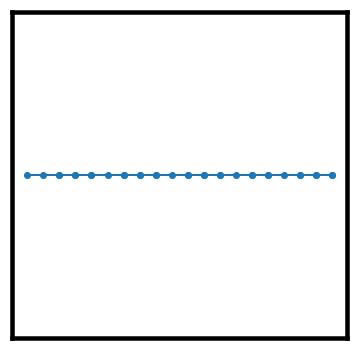

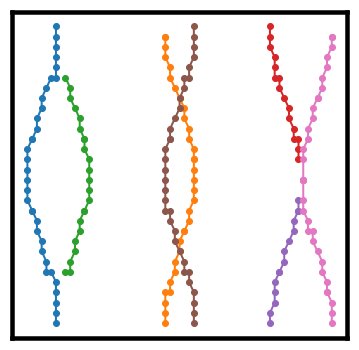

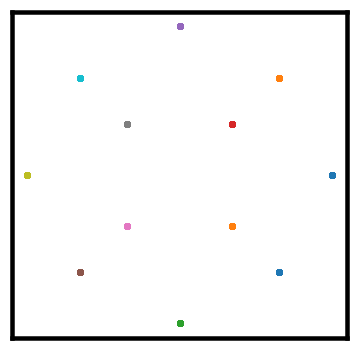

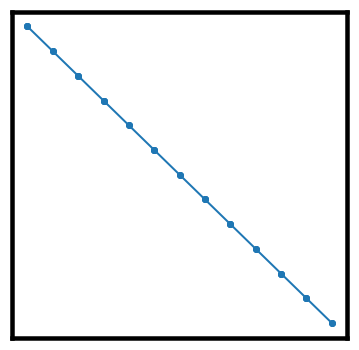

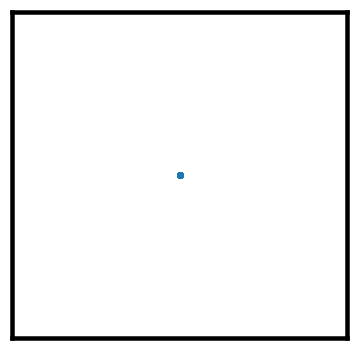

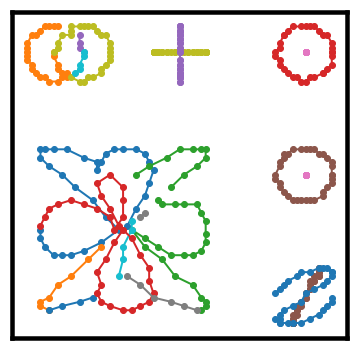

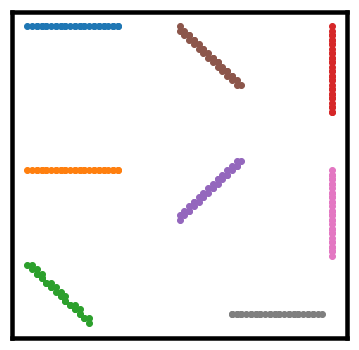

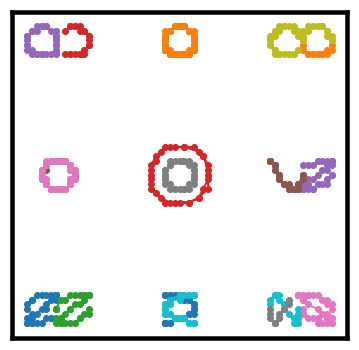

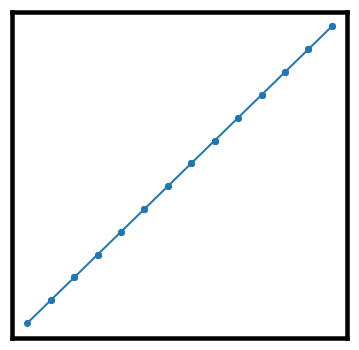

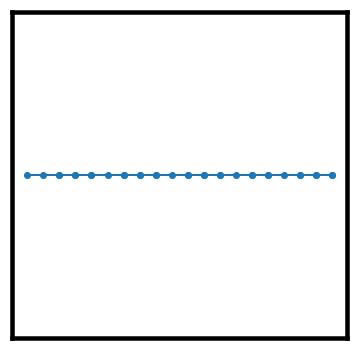

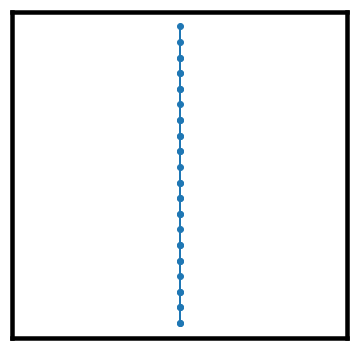

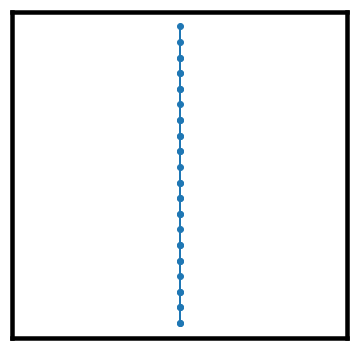

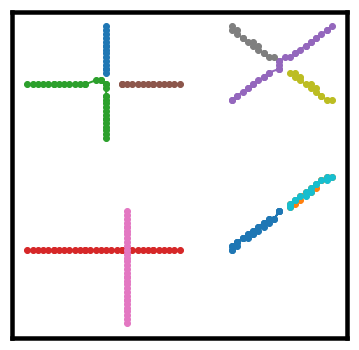

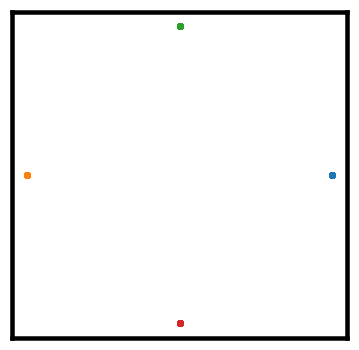

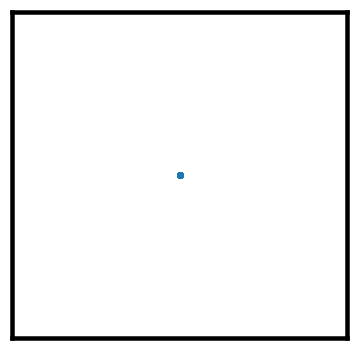

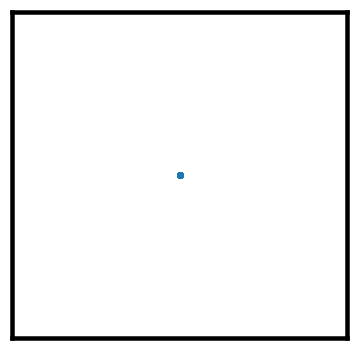

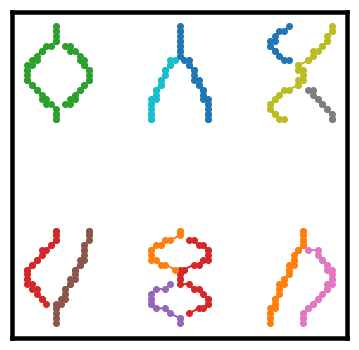

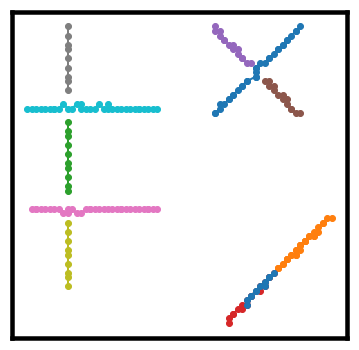

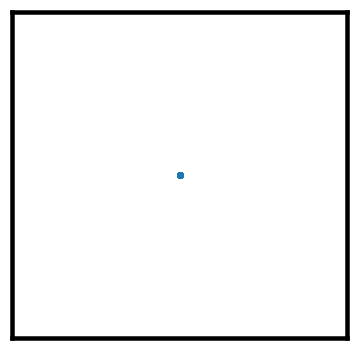

In [10]:
testSystemOnDir(target_dir, save = True, save_dir = directory)